# Smart Inbox

In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os

# GUI Dependencies importation
from tkinter import filedialog

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Machine Learning models importation
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Prompt the user to select a file using a file dialog and read 
# the selected CSV file into a pandas DataFrame
dataset = filedialog.askopenfile()
dataframe = pd.read_csv(dataset)
print(dataframe)

                                                   text  spam
0     Subject: naturally irresistible your corporate...   1.0
1     Subject: the stock trading gunslinger  fanny i...   1.0
2     Subject: unbelievable new homes made easy  im ...   1.0
3     Subject: 4 color printing special  request add...   1.0
4     Subject: do not have money , get software cds ...   1.0
...                                                 ...   ...
5725  Subject: re : research and development charges...   0.0
5726  Subject: re : receipts from visit  jim ,  than...   0.0
5727  Subject: re : enron case study update  wow ! a...   0.0
5728  Subject: re : interest  david ,  please , call...   0.0
5729  Subject: news : aurora 5 . 2 update  aurora ve...   0.0

[5730 rows x 2 columns]


## Dataframe preprocessing

At first this code selects only the first two columns of the Dataframe, and then drops duplicate rows from the DataFrame and modifies it in-place to remove all the rows from the DataFrame that contains missing values (NaN).

In [3]:
# Remove rows with missing values (NaN) from the DataFrame
dataframe = dataframe.dropna()

# # Keep only the first two columns of the DataFrame
# dataframe = dataframe.iloc[:, :2]

# # Drop duplicate rows from the DataFrame (modify it in-place)
# dataframe.drop_duplicates(inplace=True)

x, y = dataframe['text'], dataframe['spam']

This function is used to calculate the frequency counts of each unique value in the 'spam' column of a dataframe.The resulting counts represent the distribution of labels or categories within the 'spam' column. Each count indicates how many times a specific label appears in the dataset.

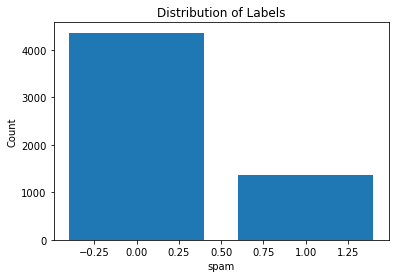

In [4]:
counts = dataframe['spam'].value_counts()

# Create a bar chart using the counts
plt.bar(counts.index, counts.values)

# Add labels and title to the chart
plt.xlabel('spam')
plt.ylabel('Count')
plt.title('Distribution of Labels')

# Display the chart
plt.show()

## Create Training and Testing datasets

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state = 1)

## Naive Bayes Model

In the context of spam email detection, BernoulliNB would be appropriate if you are representing features as binary indicators. 

Naive Bayes models assume the prior probabilities of classes are proportional to their frequencies in the training set.Setting fit_prior=False forces uniform prior probabilities for all classes.

In [7]:
# Create an instance of the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Convert the text data into numerical vectors
xtrain_vectorized = vectorizer.fit_transform(xtrain)
xtest_vectorized = vectorizer.transform(xtest)

# Create an instance of the Bernoulli Naive Bayes model
naive_bayes_model = BernoulliNB(alpha=1, fit_prior=False)

# Fit the model to the vectorized training data
naive_bayes_model.fit(xtrain_vectorized, ytrain)
y_pred = naive_bayes_model.predict(xtest_vectorized)

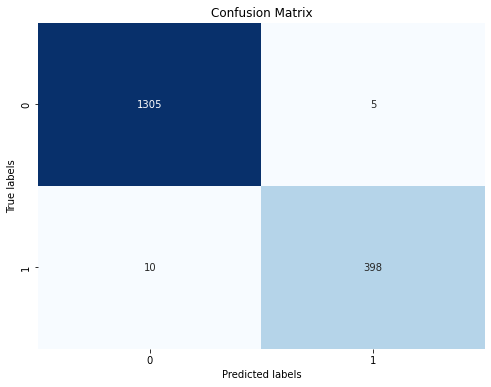

In [8]:
cm = confusion_matrix(ytest, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Predict the labels for the test data
y_pred = naive_bayes_model.predict(xtest_vectorized)
val_accuracy = naive_bayes_model.score(xtest_vectorized, y_pred)

# Calculate the F1 score
f1 = f1_score(ytest, y_pred)

print("F1 Score:", f1)

F1 Score: 0.9815043156596794


## Logistic Regession 

In [17]:
logistic_regression = LogisticRegression(class_weight="balanced")
logistic_regression.fit(xtrain_vectorized, ytrain)
y_pred_logistic_regression = logistic_regression.predict(xtest_vectorized)

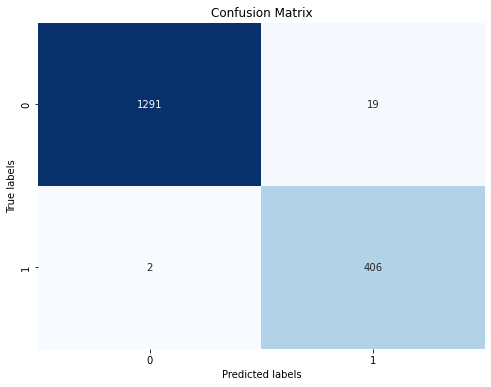

In [18]:
cm = confusion_matrix(ytest, y_pred_logistic_regression)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Predict the labels for the test data
val_accuracy = logistic_regression.score(xtest_vectorized, y_pred_logistic_regression)

# Calculate the F1 score
f1 = f1_score(ytest, y_pred_logistic_regression)

print("F1 Score:", f1)
print("Accuracy:", val_accuracy)

F1 Score: 0.9747899159663866
Accuracy: 1.0


## Random Forest Classifier

In [24]:
clf = RandomForestClassifier()
clf.fit(xtrain_vectorized, ytrain)
y_pred_clf = clf.predict(xtest_vectorized)

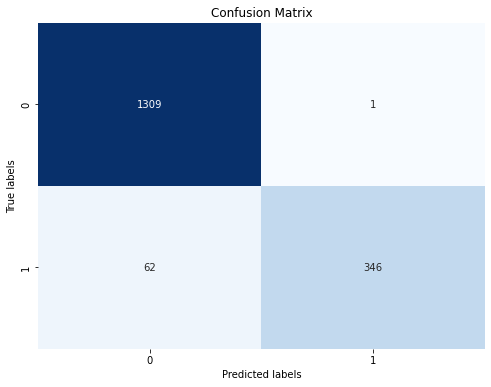

In [25]:
cm = confusion_matrix(ytest, y_pred_clf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Predict the labels for the test data
val_accuracy = logistic_regression.score(xtest_vectorized, y_pred_clf)

# Calculate the F1 score
f1 = f1_score(ytest, y_pred_clf)

print("F1 Score:", f1)
print("Accuracy:", val_accuracy)

F1 Score: 0.9165562913907285
Accuracy: 0.9545983701979045
